## **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

## **Load and Visualize the Data**

In [2]:
# Load the datasets with the correct date column names
jj_data = pd.read_csv('jj.csv', parse_dates=['date'], index_col='date')
amzn_data = pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col='Date')

In [3]:
# Display the first few rows of both datasets
print("Johnson & Johnson Sales Data:")
print(jj_data.head())

Johnson & Johnson Sales Data:
            data
date            
1960-01-01  0.71
1960-04-01  0.63
1960-07-02  0.85
1960-10-01  0.44
1961-01-01  0.61


In [4]:
print("\nAmazon Stock Price Data:")
print(amzn_data.head())


Amazon Stock Price Data:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-02-20  72.324501  74.438499  72.324501  73.417503  73.417503  129984000
2018-02-21  74.250000  75.174500  73.945999  74.146004  74.146004  126088000
2018-02-22  74.767998  75.126999  73.788002  74.266998  74.266998   97162000
2018-02-23  74.766998  75.000000  74.324997  75.000000  75.000000   88362000
2018-02-26  75.459999  76.141998  75.349998  76.097504  76.097504   99100000


In [5]:
jj_data.describe()

,data
count,84.000000
mean,4.799762
std,4.309991
min,0.440000
25%,1.247500
50%,3.510000
75%,7.132500
max,16.200000


In [6]:
amzn_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,120.663254,122.124638,119.039742,120.591815,120.591815,8.545871e+07
std,34.824329,35.191093,34.406018,34.756745,34.756745,3.952944e+07
min,67.300003,69.801498,65.349998,67.197998,67.197998,1.762600e+07
25%,89.720249,90.347000,88.685001,89.639252,89.639252,5.876900e+07
50%,108.103500,110.780502,106.320000,108.000000,108.000000,7.434830e+07
75%,158.343750,159.924003,156.199997,158.086998,158.086998,1.007690e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


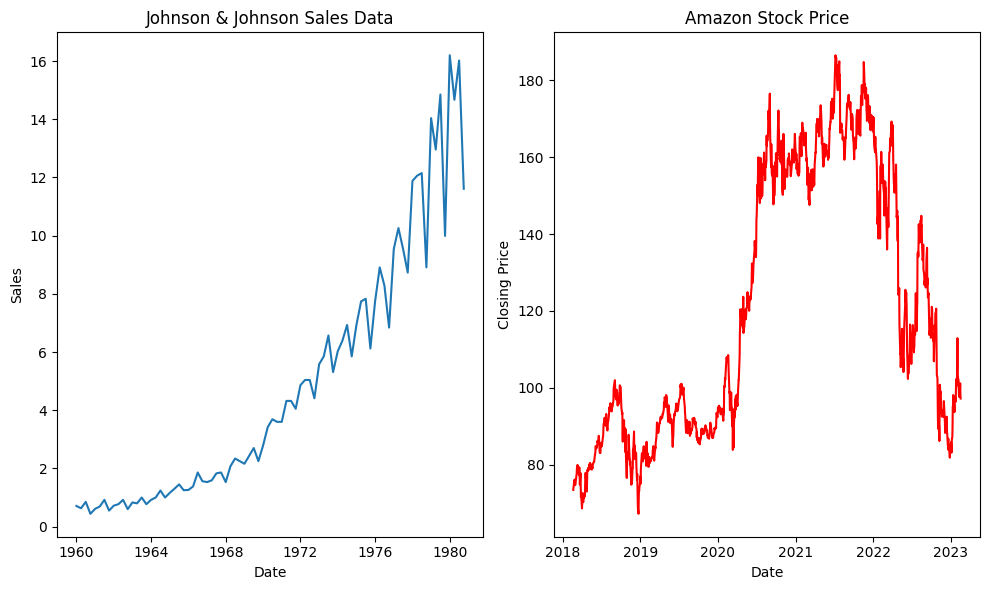

In [7]:
# Visualize the sales data for Johnson & Johnson and Amazon's stock price
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(jj_data, label='Johnson & Johnson Sales')
plt.title("Johnson & Johnson Sales Data")
plt.xlabel('Date')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
plt.plot(amzn_data['Close'], label='Amazon Stock Price', color='red')
plt.title("Amazon Stock Price")
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.tight_layout()
plt.show()

## **Check for Stationarity**

In [8]:
# Function to perform ADF test
def test_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

In [9]:
# Perform the ADF test on both datasets
print("Testing stationarity for Johnson & Johnson Sales Data:")
test_stationarity(jj_data['data'])

Testing stationarity for Johnson & Johnson Sales Data:
ADF Statistic: 2.742016573457473
p-value: 1.0
Critical Values:
	1%: -3.524624466842421
	5%: -2.9026070739026064
	10%: -2.5886785262345677
The series is non-stationary.


In [10]:
print("\nTesting stationarity for Amazon Stock Price Data:")
test_stationarity(amzn_data['Close'])


Testing stationarity for Amazon Stock Price Data:
ADF Statistic: -1.657808991333173
p-value: 0.45297105465166737
Critical Values:
	1%: -3.4355588184378574
	5%: -2.8638402312881497
	10%: -2.5679946684494275
The series is non-stationary.


## **Make the Data Stationary**

In [11]:
amzn_data_diff = amzn_data['Close'].diff().dropna()

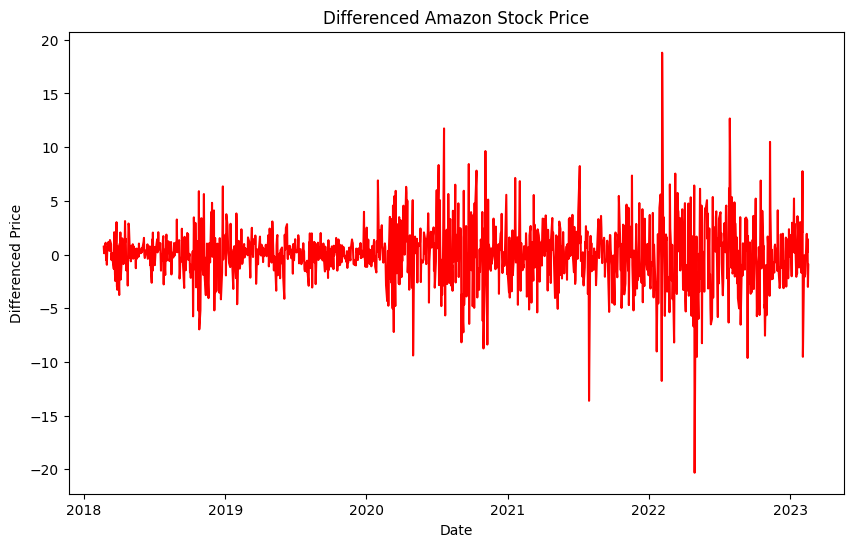

In [12]:
# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(amzn_data_diff, label='Differenced Amazon Stock Price', color='red')
plt.title("Differenced Amazon Stock Price")
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

In [13]:
# Perform the ADF test on the differenced datasets
print("\nTesting stationarity for Differenced Amazon Stock Price Data:")
test_stationarity(amzn_data_diff)


Testing stationarity for Differenced Amazon Stock Price Data:
ADF Statistic: -36.250779332427754
p-value: 0.0
Critical Values:
	1%: -3.4355629707955395
	5%: -2.863842063387667
	10%: -2.567995644141416
The series is stationary.


In [14]:
# Apply second differencing
jj_data_diff = jj_data['data'].diff().dropna()
jj_data_diff2 = jj_data_diff.diff().dropna()

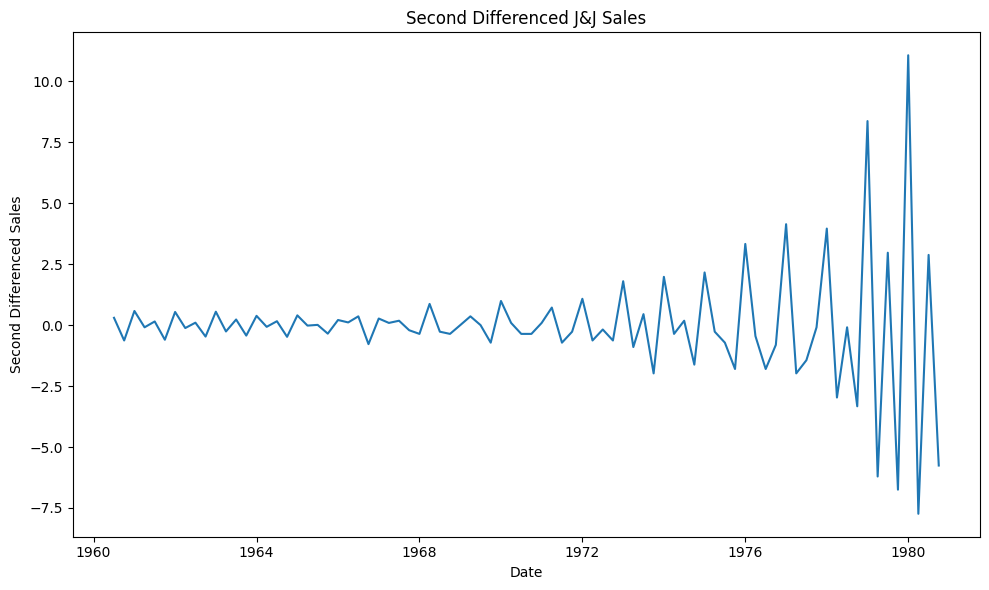

In [15]:
# Plot the second differenced data
plt.figure(figsize=(10, 6))
plt.plot(jj_data_diff2, label='Second Differenced J&J Sales')
plt.title("Second Differenced J&J Sales")
plt.xlabel('Date')
plt.ylabel('Second Differenced Sales')
plt.tight_layout()
plt.show()

In [16]:
# Perform the ADF test again on the second differenced data
print("Testing stationarity for Second Differenced Johnson & Johnson Sales Data:")
test_stationarity(jj_data_diff2)

Testing stationarity for Second Differenced Johnson & Johnson Sales Data:
ADF Statistic: -3.585162874793184
p-value: 0.006051099869603106
Critical Values:
	1%: -3.524624466842421
	5%: -2.9026070739026064
	10%: -2.5886785262345677
The series is stationary.


## **ARMA Model and Forecasting**

In [17]:
# ARIMA Model function
def arima_model(data, p=1, d=1, q=1):
    # Fit ARIMA model (p, d, q)
    model = sm.tsa.ARIMA(data, order=(p, d, q)).fit()
    print(model.summary())  # Display the model summary
    return model

In [18]:
# Fit the ARIMA model for Amazon Stock Price (first differenced)
amzn_arma_model = arima_model(amzn_data_diff, p=1, d=1, q=1)  # We can fine-tune p, d, q values

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3065.526
Date:                Sat, 05 Apr 2025   AIC                           6137.052
Time:                        15:57:22   BIC                           6152.462
Sample:                             0   HQIC                          6142.844
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0230      0.022     -1.063      0.288      -0.066       0.019
ma.L1         -0.9980      0.003   -372.623      0.000      -1.003      -0.993
sigma2         7.6538      0.173     44.140      0.0

In [19]:
# Fit the ARIMA model for Johnson & Johnson Sales (second differenced)
jj_arma_model = arima_model(jj_data_diff2, p=1, d=1, q=1)  # We can fine-tune p, d, q values

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   82
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -157.556
Date:                Sat, 05 Apr 2025   AIC                            321.113
Time:                        15:57:22   BIC                            328.296
Sample:                             0   HQIC                           323.995
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7653      0.060    -12.654      0.000      -0.884      -0.647
ma.L1         -0.9997     11.157     -0.090      0.929     -22.868      20.868
sigma2         2.6474     29.614      0.089      0.9

In [20]:
# Forecast the next 24 months for both models
jj_forecast_values = jj_arma_model.forecast(steps=24)
amzn_forecast_values = amzn_arma_model.forecast(steps=24)

# Create a date range for the forecasted values (next 24 months)
jj_forecast_index = pd.date_range(start=jj_data.index[-1], periods=25, freq='M')[1:]
amzn_forecast_index = pd.date_range(start=amzn_data.index[-1], periods=25, freq='M')[1:]

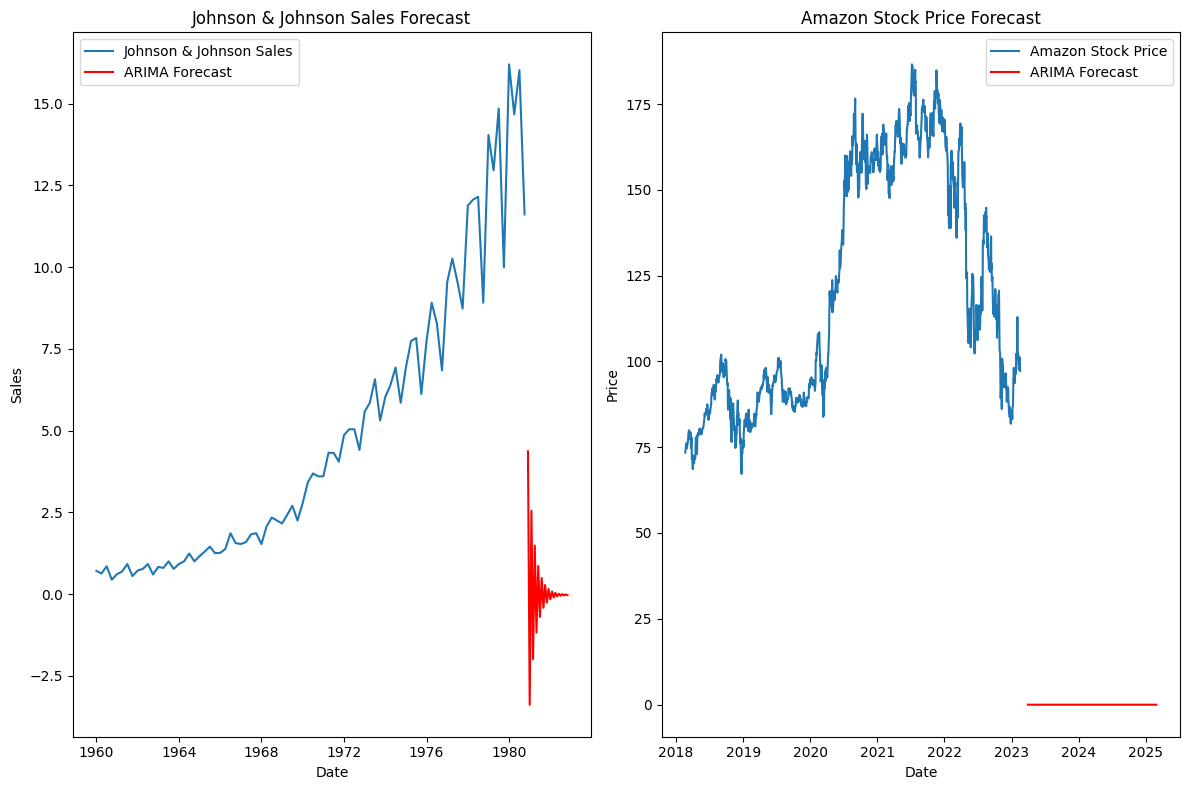

In [21]:
# Plot the forecast for both datasets
plt.figure(figsize=(12, 8))

# Plot for Johnson & Johnson Sales
plt.subplot(1, 2, 1)
plt.plot(jj_data['data'], label='Johnson & Johnson Sales')
plt.plot(jj_forecast_index, jj_forecast_values, label='ARIMA Forecast', color='red')
plt.title("Johnson & Johnson Sales Forecast")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Plot for Amazon Stock Price
plt.subplot(1, 2, 2)
plt.plot(amzn_data['Close'], label='Amazon Stock Price')
plt.plot(amzn_forecast_index, amzn_forecast_values, label='ARIMA Forecast', color='red')
plt.title("Amazon Stock Price Forecast")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

## **Build the Neural Network Models (LSTM and GRU)**

In [22]:
# Preprocess the data for LSTM/GRU (reshape into [samples, time_steps, features])
def preprocess_data(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Use second differenced data for J&J and first differenced data for Amazon
jj_scaled = scaler.fit_transform(jj_data_diff2.values.reshape(-1, 1))
amzn_scaled = scaler.fit_transform(amzn_data_diff.values.reshape(-1, 1))

In [23]:
# Split data into train and test sets
jj_train, jj_test = train_test_split(jj_scaled, test_size=0.2, shuffle=False)
amzn_train, amzn_test = train_test_split(amzn_scaled, test_size=0.2, shuffle=False)

# Prepare the data for LSTM/GRU (reshape into [samples, time_steps, features])
time_steps = 5  # Adjust as needed
X_train_jj, y_train_jj = preprocess_data(jj_train, time_steps)
X_test_jj, y_test_jj = preprocess_data(jj_test, time_steps)

X_train_amzn, y_train_amzn = preprocess_data(amzn_train, time_steps)
X_test_amzn, y_test_amzn = preprocess_data(amzn_test, time_steps)

# Reshape data for LSTM/GRU (samples, time_steps, features)
X_train_jj = X_train_jj.reshape((X_train_jj.shape[0], X_train_jj.shape[1], 1))
X_test_jj = X_test_jj.reshape((X_test_jj.shape[0], X_test_jj.shape[1], 1))

X_train_amzn = X_train_amzn.reshape((X_train_amzn.shape[0], X_train_amzn.shape[1], 1))
X_test_amzn = X_test_amzn.reshape((X_test_amzn.shape[0], X_test_amzn.shape[1], 1))

In [24]:
# Build LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [25]:
# Build GRU Model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### Build models for Johnson & Johnson Sales (LSTM and GRU)

In [26]:
lstm_model_jj = build_lstm_model(X_train_jj.shape[1:])
gru_model_jj = build_gru_model(X_train_jj.shape[1:])

In [27]:
lstm_model_jj.fit(X_train_jj, y_train_jj, epochs=10, batch_size=32, validation_data=(X_test_jj, y_test_jj))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 0.1271 - val_loss: 0.1994
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1027 - val_loss: 0.1784
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0821 - val_loss: 0.1597
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0595 - val_loss: 0.1437
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0427 - val_loss: 0.1305
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0262 - val_loss: 0.1206
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0164 - val_loss: 0.1141
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0071 - val_loss: 0.1114
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0035 - val_loss: 0.1122
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0028 - val_loss: 0.1155


In [28]:
gru_model_jj.fit(X_train_jj, y_train_jj, epochs=10, batch_size=32, validation_data=(X_test_jj, y_test_jj))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - loss: 0.1869 - val_loss: 0.2293
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1397 - val_loss: 0.1898
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0974 - val_loss: 0.1578
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0643 - val_loss: 0.1334
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0365 - val_loss: 0.1165
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0187 - val_loss: 0.1070
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0064 - val_loss: 0.1044
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0030 - val_loss: 0.1072
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040 - val_loss: 0.1127
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - val_loss: 0.1177


In [29]:
lstm_pred_jj = lstm_model_jj.predict(X_test_jj)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [30]:
gru_pred_jj = gru_model_jj.predict(X_test_jj)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [31]:
lstm_pred_jj = scaler.inverse_transform(lstm_pred_jj)

In [32]:
gru_pred_jj = scaler.inverse_transform(gru_pred_jj)

In [33]:
# LSTM Model Evaluation (Johnson & Johnson Sales)
mse_lstm_jj = mean_squared_error(y_test_jj, lstm_pred_jj)
rmse_lstm_jj = np.sqrt(mse_lstm_jj)
r2_lstm_jj = r2_score(y_test_jj, lstm_pred_jj)

# GRU Model Evaluation (Johnson & Johnson Sales)
mse_gru_jj = mean_squared_error(y_test_jj, gru_pred_jj)
rmse_gru_jj = np.sqrt(mse_gru_jj)
r2_gru_jj = r2_score(y_test_jj, gru_pred_jj)
# Print LSTM and GRU Evaluation Results
print(f"Johnson & Johnson LSTM Model Evaluation:")
print(f"MSE: {mse_lstm_jj}")
print(f"RMSE: {rmse_lstm_jj}")
print(f"R-squared: {r2_lstm_jj}\n")

print(f"Johnson & Johnson GRU Model Evaluation:")
print(f"MSE: {mse_gru_jj}")
print(f"RMSE: {rmse_gru_jj}")
print(f"R-squared: {r2_gru_jj}\n")

Johnson & Johnson LSTM Model Evaluation:
MSE: 11.665328578065685
RMSE: 3.4154543735886276
R-squared: -116.51989121899909

Johnson & Johnson GRU Model Evaluation:
MSE: 1.778456333299166
RMSE: 1.3335877673775978
R-squared: -16.916683051692875



#### Build models for Amazon Stock Price (LSTM and GRU)

In [34]:
lstm_model_amzn = build_lstm_model(X_train_amzn.shape[1:])
gru_model_amzn = build_gru_model(X_train_amzn.shape[1:])

In [35]:
lstm_model_amzn.fit(X_train_amzn, y_train_amzn, epochs=10, batch_size=32, validation_data=(X_test_amzn, y_test_amzn))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1940 - val_loss: 0.0189
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0095
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0093
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0093
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0093
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0093
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0093
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0093
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0093


In [36]:
gru_model_amzn.fit(X_train_amzn, y_train_amzn, epochs=10, batch_size=32, validation_data=(X_test_amzn, y_test_amzn))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0604 - val_loss: 0.0096
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0096
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0095
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.0096
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0094
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0094
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0095
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0095
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0093
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0093


In [37]:
lstm_pred_amzn = lstm_model_amzn.predict(X_test_amzn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [38]:
gru_pred_amzn = gru_model_amzn.predict(X_test_amzn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [39]:
lstm_pred_amzn = scaler.inverse_transform(lstm_pred_amzn)
gru_pred_amzn = scaler.inverse_transform(gru_pred_amzn)

In [40]:
# LSTM Model Evaluation (Amazon Stock Price)
mse_lstm_amzn = mean_squared_error(y_test_amzn, lstm_pred_amzn)
rmse_lstm_amzn = np.sqrt(mse_lstm_amzn)
r2_lstm_amzn = r2_score(y_test_amzn, lstm_pred_amzn)

# GRU Model Evaluation (Amazon Stock Price)
mse_gru_amzn = mean_squared_error(y_test_amzn, gru_pred_amzn)
rmse_gru_amzn = np.sqrt(mse_gru_amzn)
r2_gru_amzn = r2_score(y_test_amzn, gru_pred_amzn)

print(f"Amazon LSTM Model Evaluation:")
print(f"MSE: {mse_lstm_amzn}")
print(f"RMSE: {rmse_lstm_amzn}")
print(f"R-squared: {r2_lstm_amzn}\n")

print(f"Amazon GRU Model Evaluation:")
print(f"MSE: {mse_gru_amzn}")
print(f"RMSE: {rmse_gru_amzn}")
print(f"R-squared: {r2_gru_amzn}\n")

Amazon LSTM Model Evaluation:
MSE: 1.3228218135497563
RMSE: 1.150139910423839
R-squared: -148.48745283157106

Amazon GRU Model Evaluation:
MSE: 1.9124335400351549
RMSE: 1.382907639734178
R-squared: -215.1174057467011



#### Prediction plot

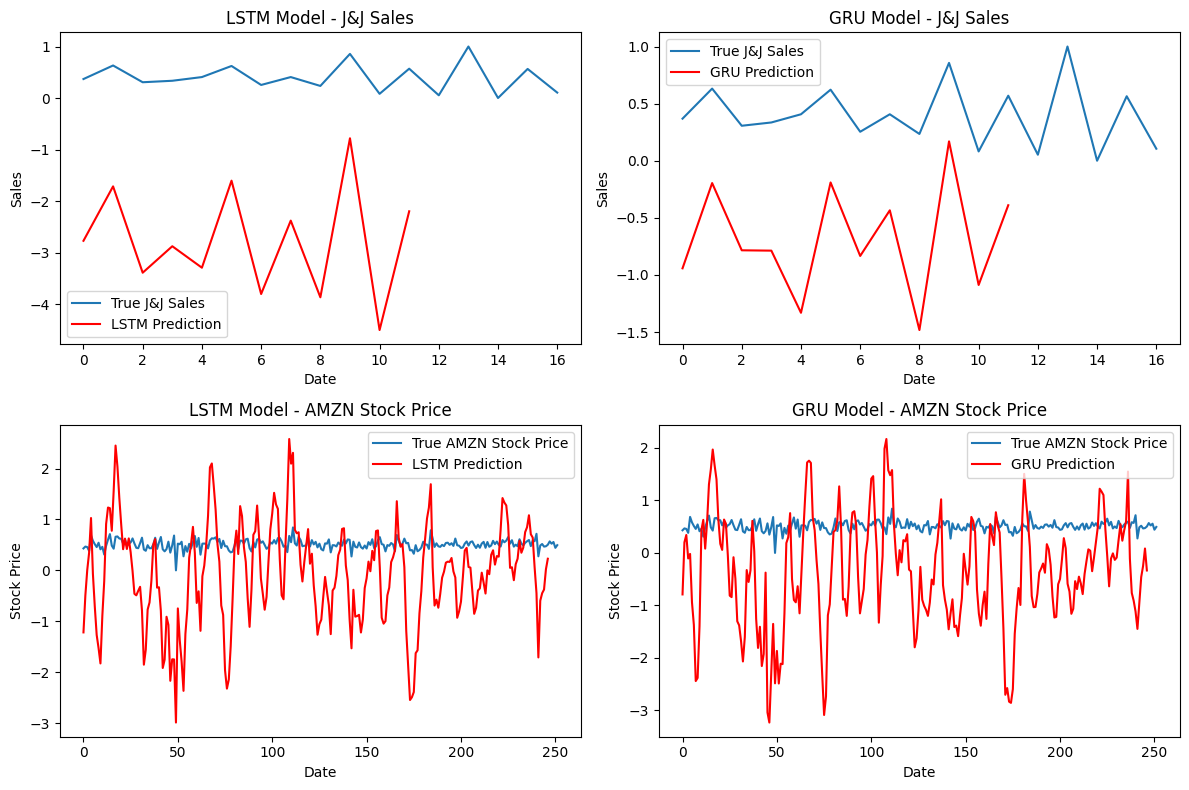

In [41]:
# Plotting the results
plt.figure(figsize=(12, 8))

# Johnson & Johnson Sales
plt.subplot(2, 2, 1)
plt.plot(jj_test, label='True J&J Sales')
plt.plot(lstm_pred_jj, label='LSTM Prediction', color='red')
plt.title("LSTM Model - J&J Sales")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(jj_test, label='True J&J Sales')
plt.plot(gru_pred_jj, label='GRU Prediction', color='red')
plt.title("GRU Model - J&J Sales")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Amazon Stock Price
plt.subplot(2, 2, 3)
plt.plot(amzn_test, label='True AMZN Stock Price')
plt.plot(lstm_pred_amzn, label='LSTM Prediction', color='red')
plt.title("LSTM Model - AMZN Stock Price")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(amzn_test, label='True AMZN Stock Price')
plt.plot(gru_pred_amzn, label='GRU Prediction', color='red')
plt.title("GRU Model - AMZN Stock Price")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()